<a href="https://colab.research.google.com/github/demitw/Machine-learning-coursework/blob/preprocessing/preprocessing/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.shape

(41188, 21)

In [13]:
#describe of numerical columns
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [29]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [33]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 3


<ipython-input-34-6a0f6dded890>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[discrete_feature])
<ipython-input-34-6a0f6dded890>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[discrete_feature])
<ipython-input-34-6a0f6dded890>:6: UserWarning: 

`distplot` is a deprecated function and 

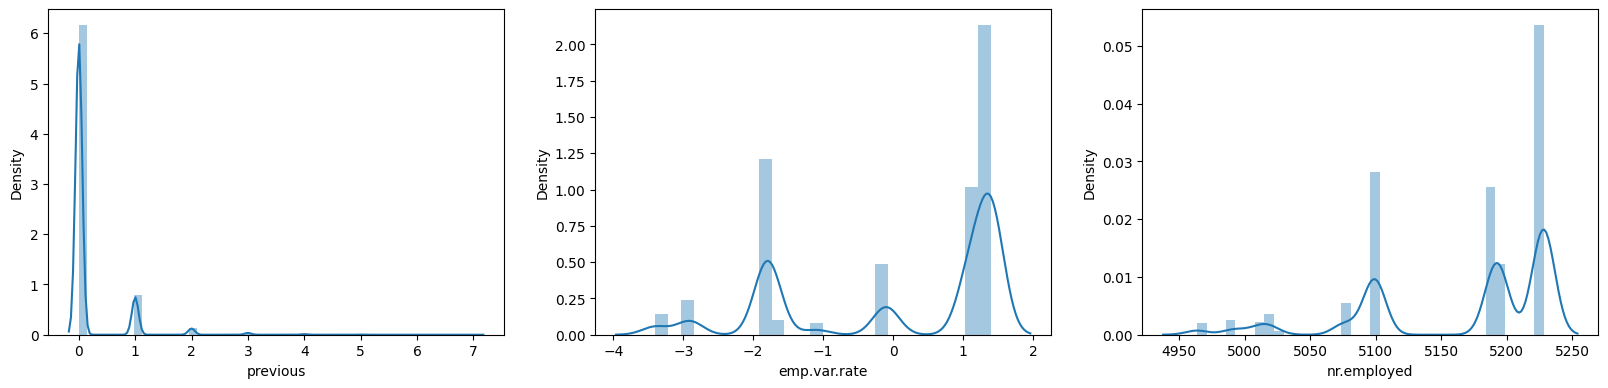

In [34]:
#plot a univariate distribution of discrete observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for discrete_feature in discrete_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[discrete_feature])
    plt.xlabel(discrete_feature)
    plotnumber+=1
plt.show()

In [37]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 9


<ipython-input-38-b1aba0d088d7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-38-b1aba0d088d7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-38-b1aba0d088d7>:6: UserWarning: 

`distplot` is a deprecated function 

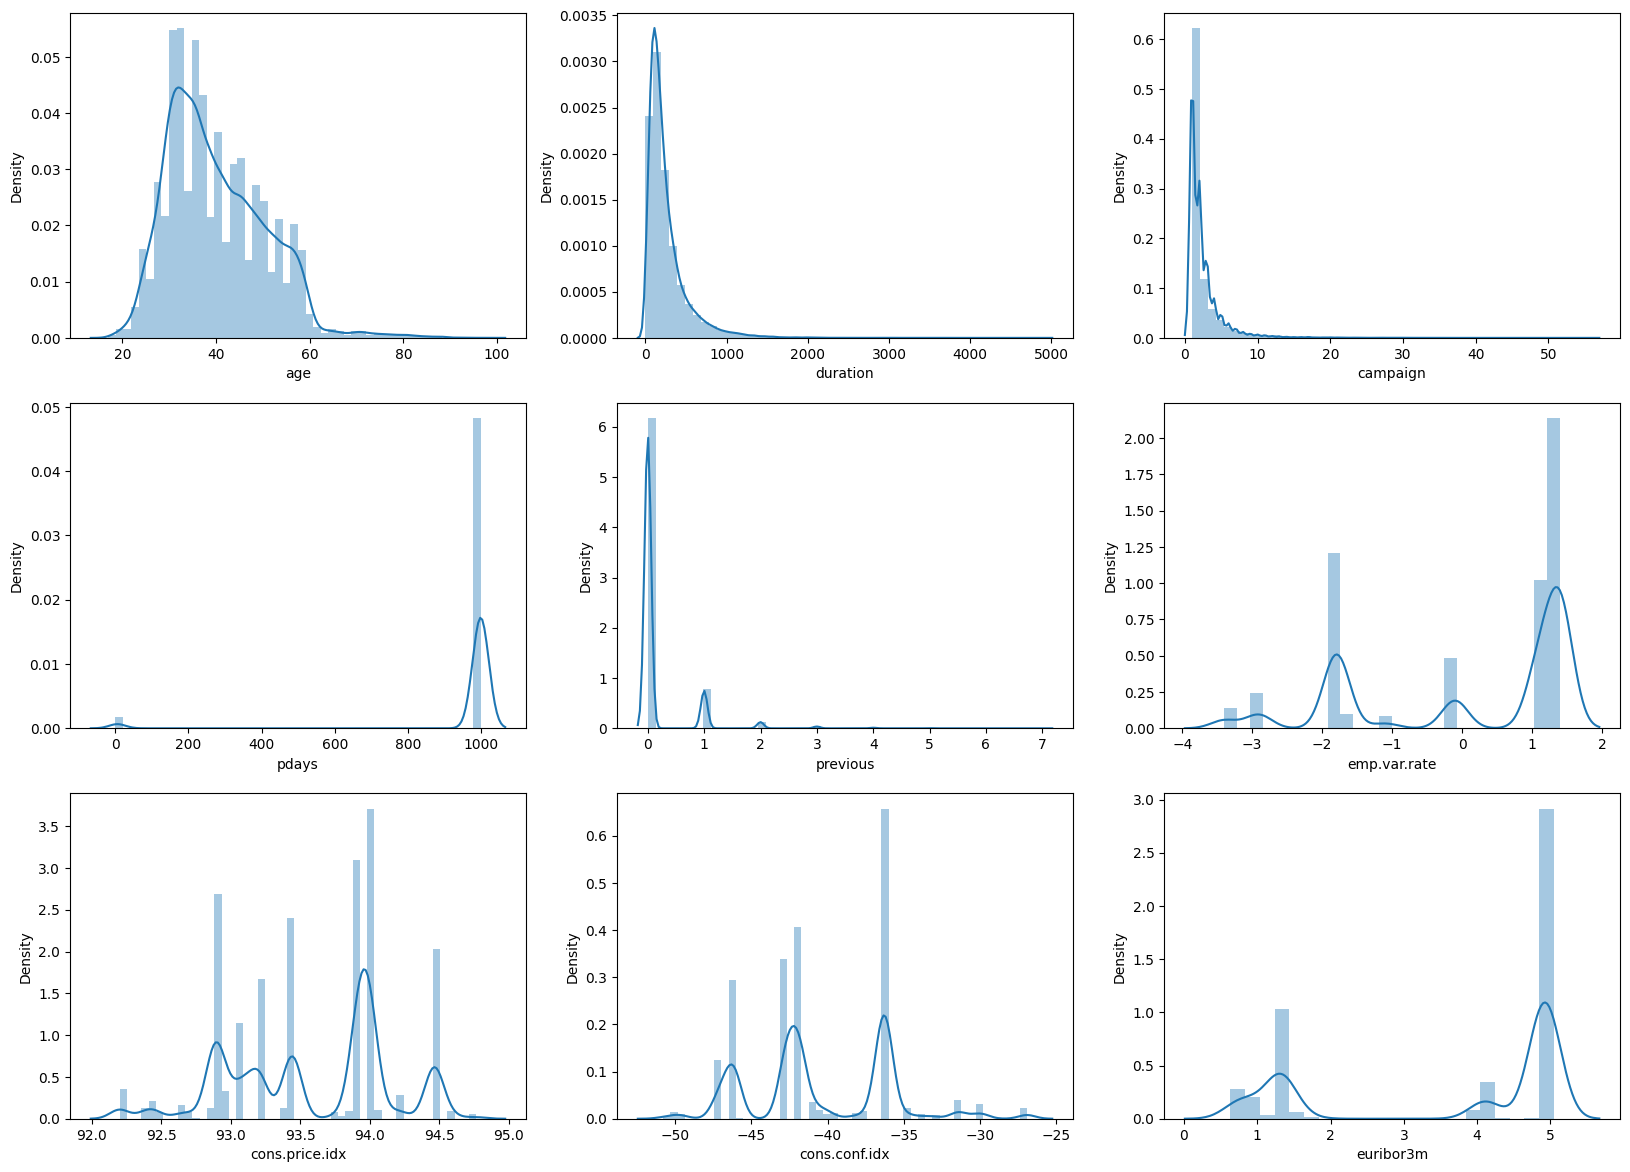

In [38]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

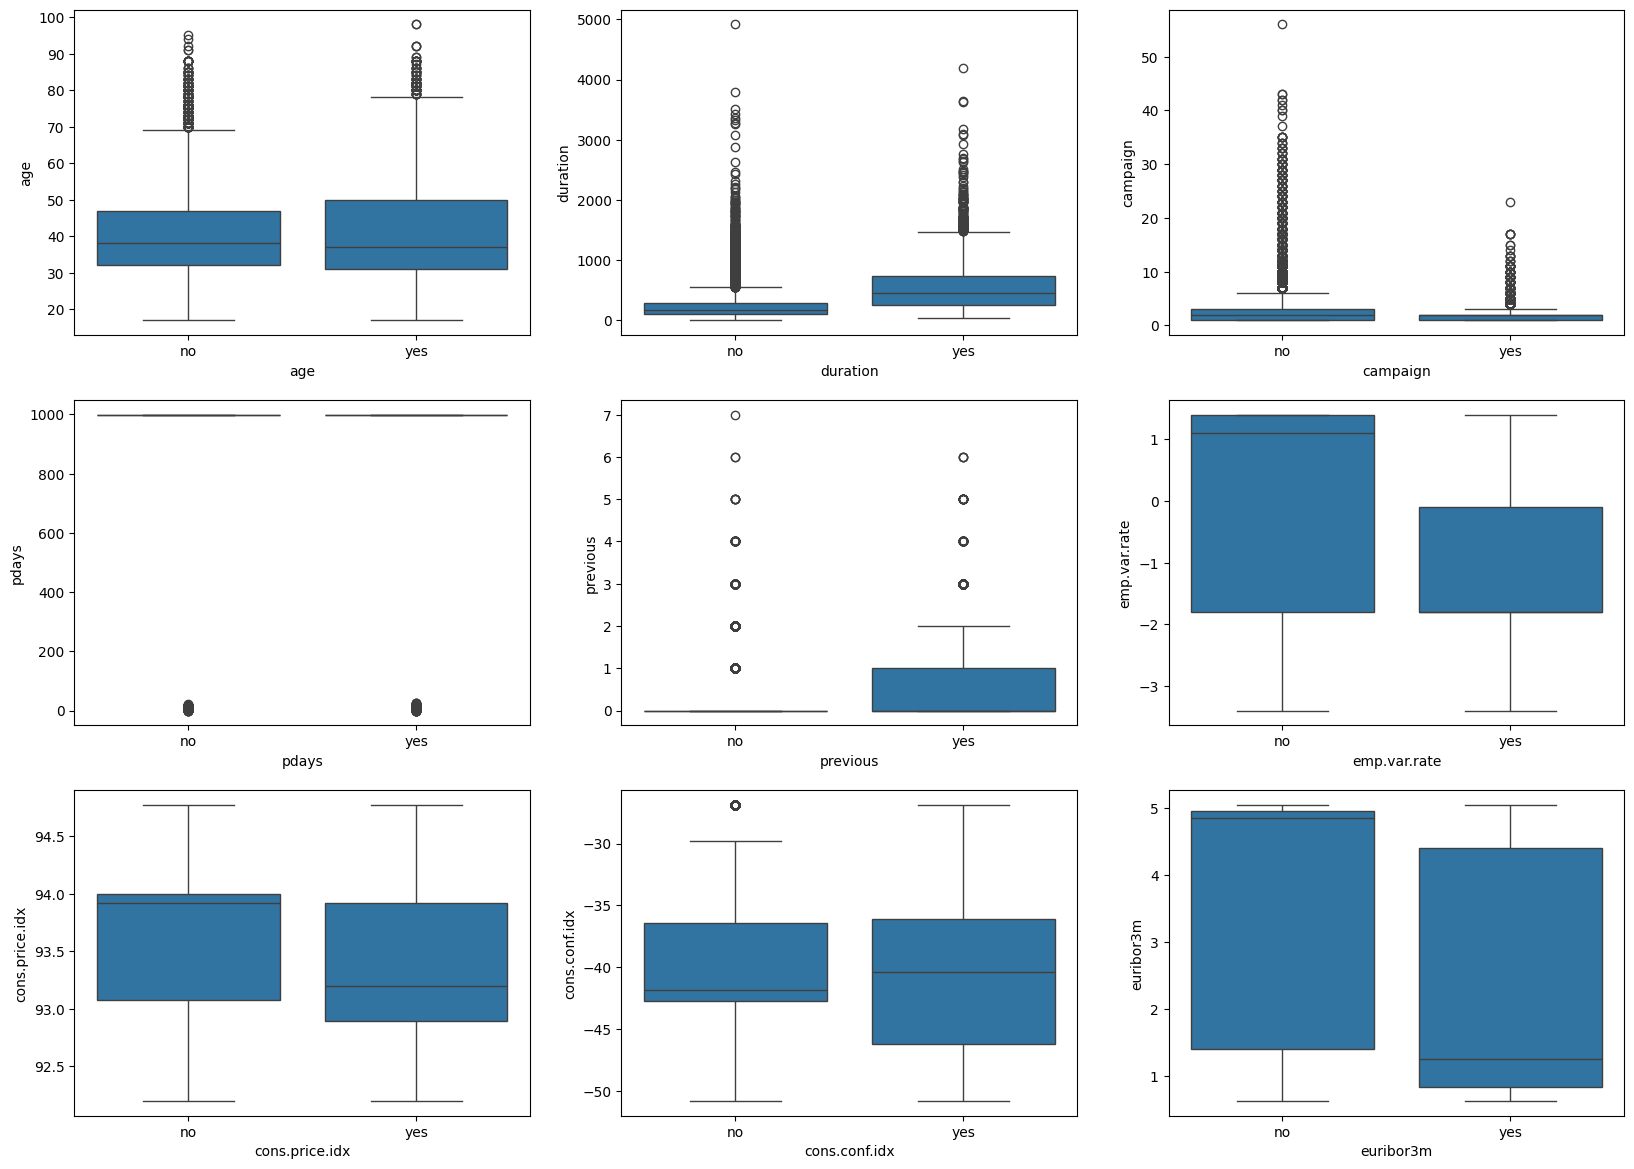

In [40]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [14]:
# Check for missing values in each column
print(df.isnull().sum())

missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [15]:
#Find Features with One Value
for column in df.columns:
    print(column,df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [16]:
unknown_counts = (df == "unknown").sum()
print(unknown_counts)

unknown_percentage = (df == "unknown").mean() * 100
print(unknown_percentage)

# Filter columns with at least one "unknown"
columns_with_unknown = unknown_counts[unknown_counts > 0]
print(columns_with_unknown)


age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000


In [17]:
# Drop rows with 'unknown' in 'loan' or 'housing' columns
df_cleaned = df[(df['loan'] != 'unknown') & (df['housing'] != 'unknown')]

# Check the shape of the new dataset
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Original dataset shape: (41188, 21)
Cleaned dataset shape: (40198, 21)


In [18]:
unknown_counts = (df_cleaned == "unknown").sum()
print(unknown_counts)

age                  0
job                325
marital             79
education         1691
default           8370
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [19]:
# Drop the 'duration' column
df_cleaned = df_cleaned.drop(columns=['duration'])

# Check the result
print(df_cleaned.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994

In [20]:
# Convert 'pdays' column to binary
df_cleaned['pdays'] = df_cleaned['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Check the result
print(df_cleaned['pdays'].head())


0    0
1    0
2    0
3    0
4    0
Name: pdays, dtype: int64


In [21]:
# Check unique values in the 'pdays' column
unique_pdays = df_cleaned['pdays'].unique()

# Print the unique values
print(unique_pdays)


[0 1]


In [22]:
# Check class distribution of the target variable 'y'
class_counts = df_cleaned['y'].value_counts()

# Print the class counts
print(class_counts)

# Optionally, display the percentage of each class
print(class_counts / len(df_cleaned) * 100)


y
no     35665
yes     4533
Name: count, dtype: int64
y
no     88.72332
yes    11.27668
Name: count, dtype: float64


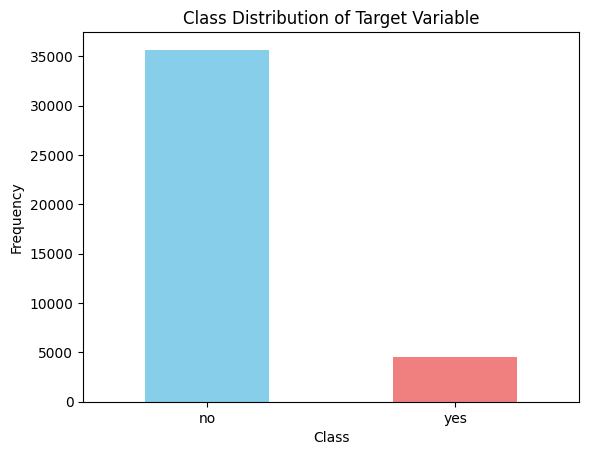

In [23]:
import matplotlib.pyplot as plt

# Plot the class distribution
df_cleaned['y'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


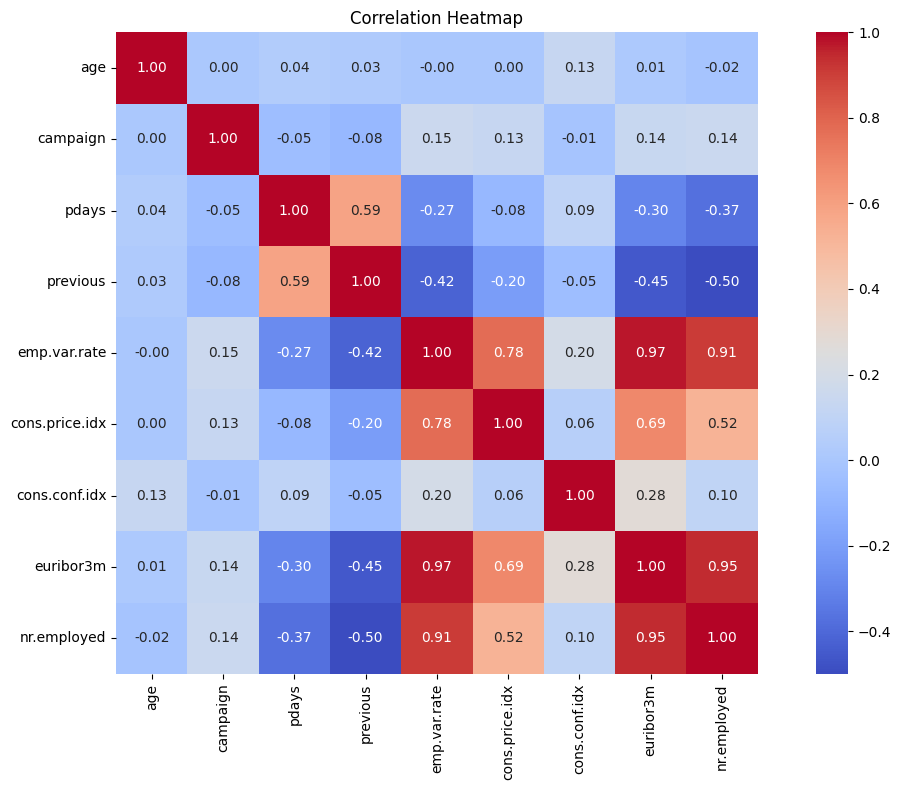

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


In [25]:
# Identify categorical features (type 'object' or 'category')
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Display the first few rows of the categorical columns
df_cleaned[categorical_columns].head()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


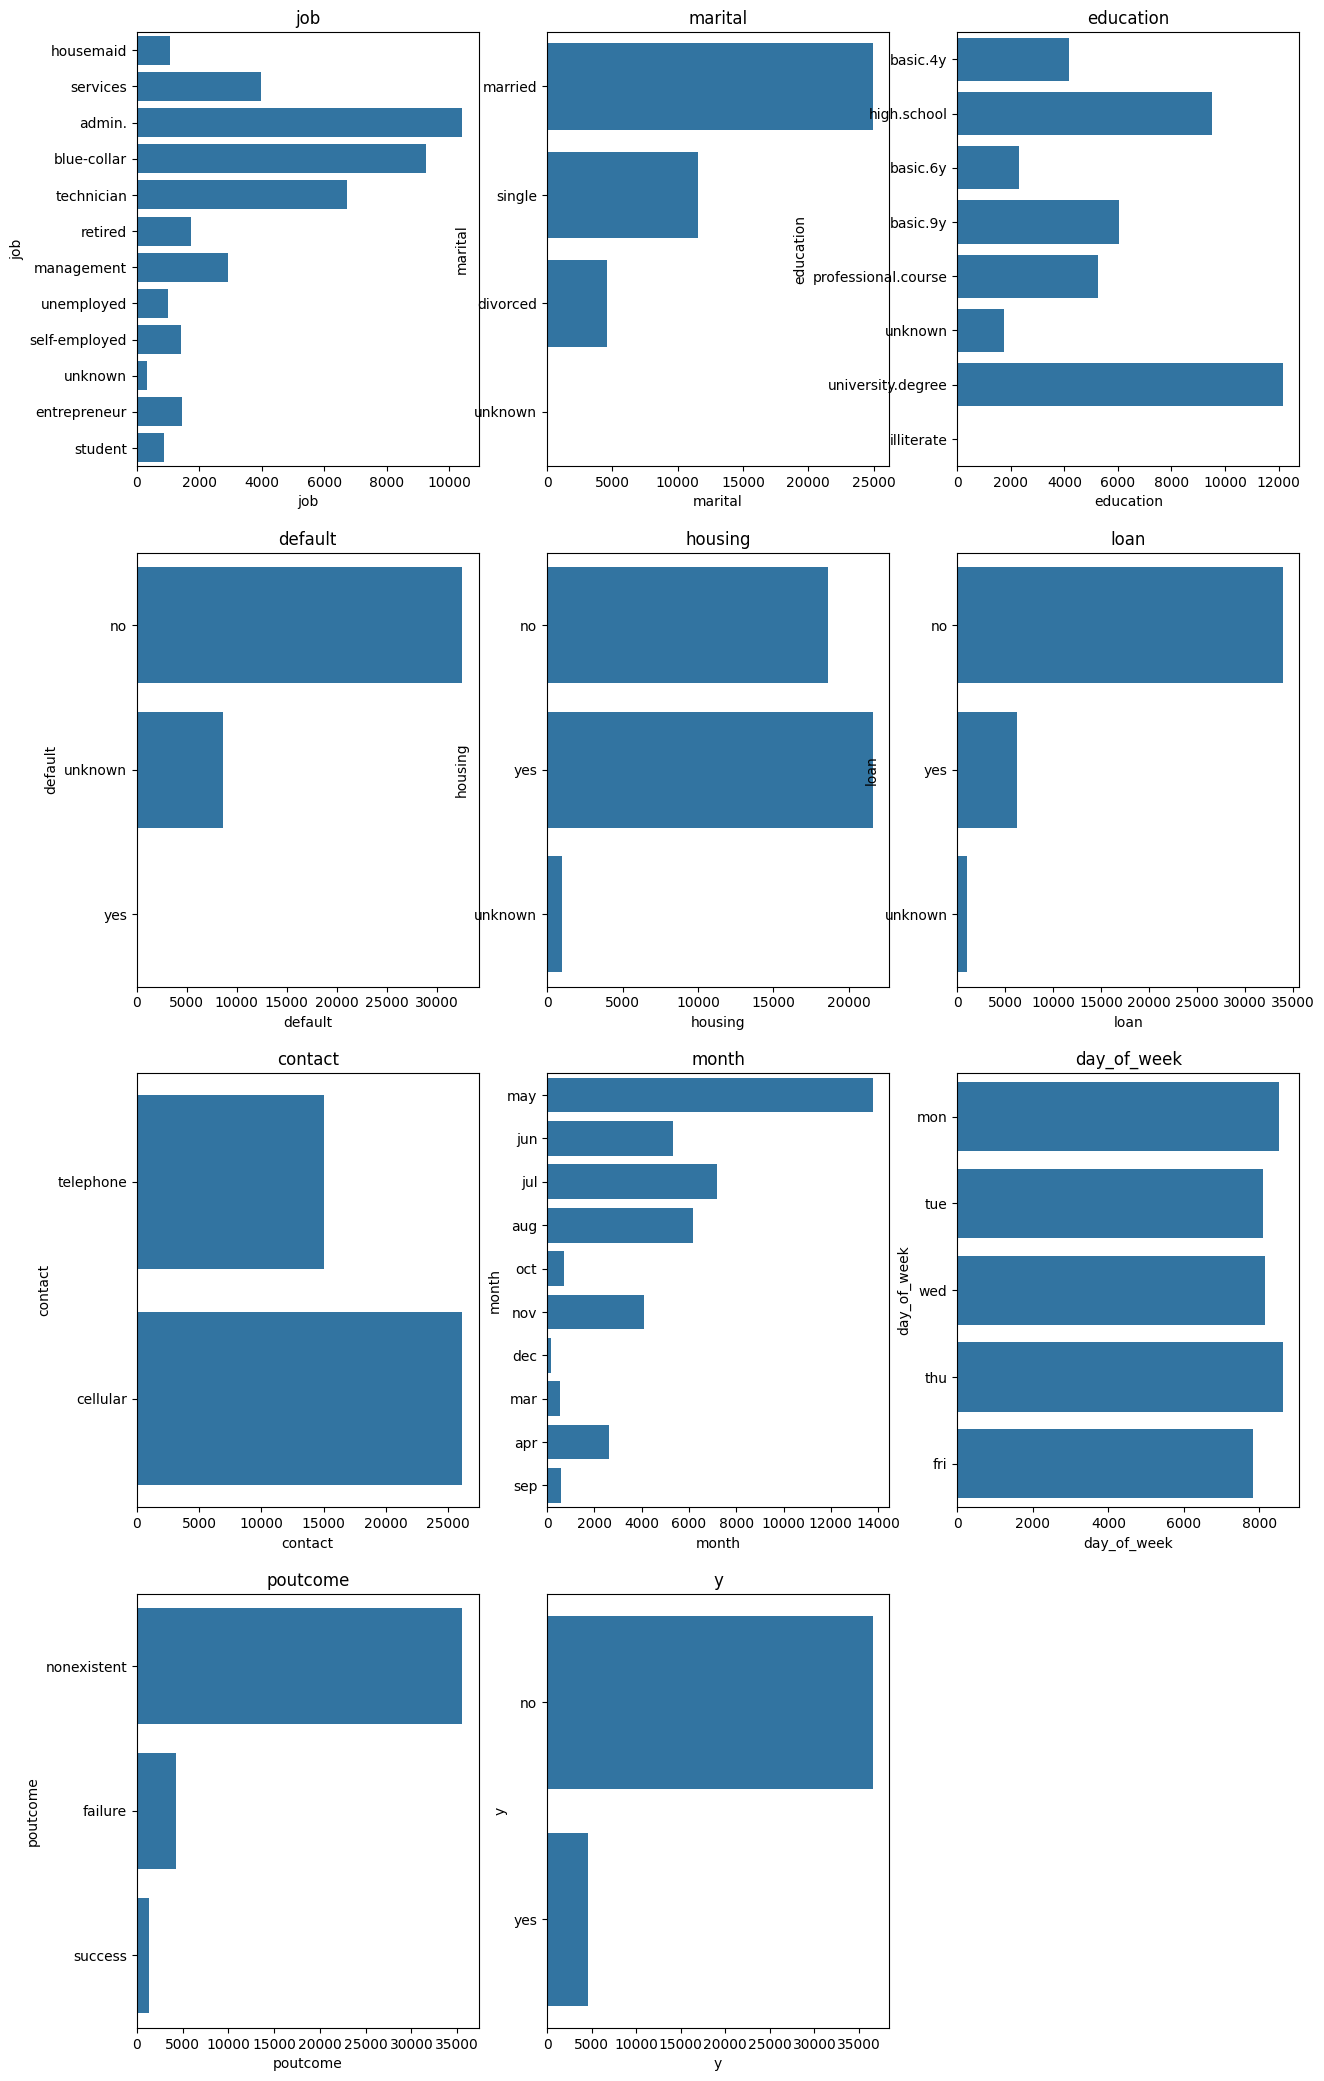

In [26]:

#check count based on categorical features

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_column in categorical_columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_column,data=df)
    plt.xlabel(categorical_column)
    plt.title(categorical_column)
    plotnumber+=1
plt.show()

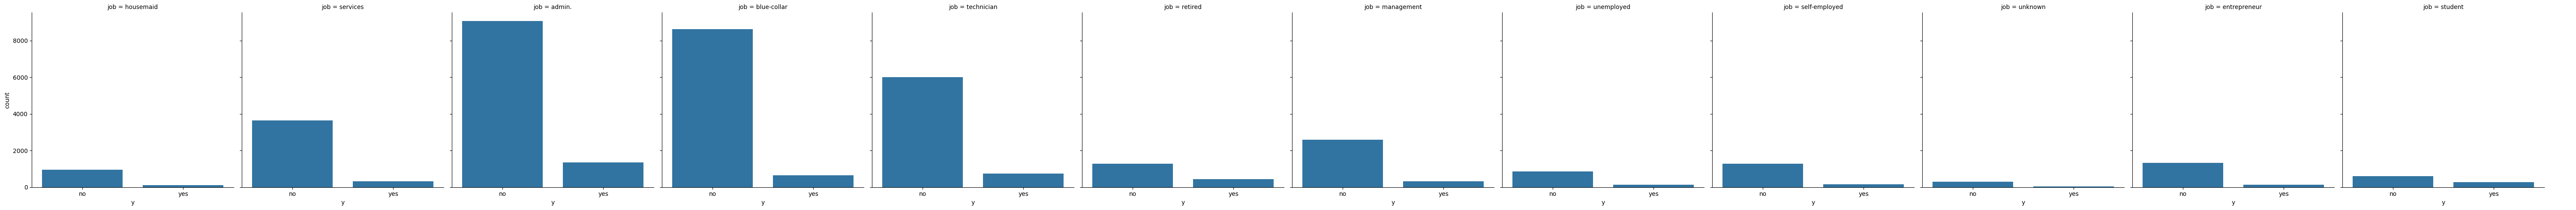

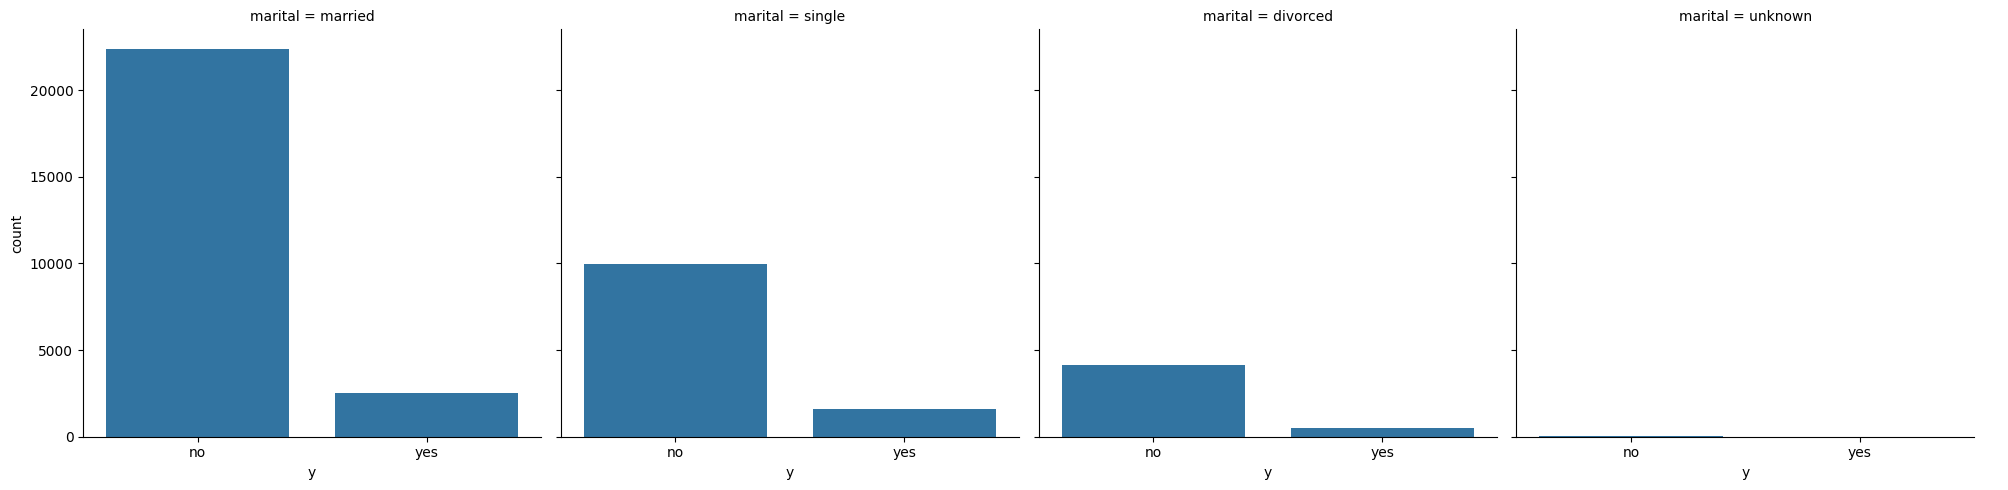

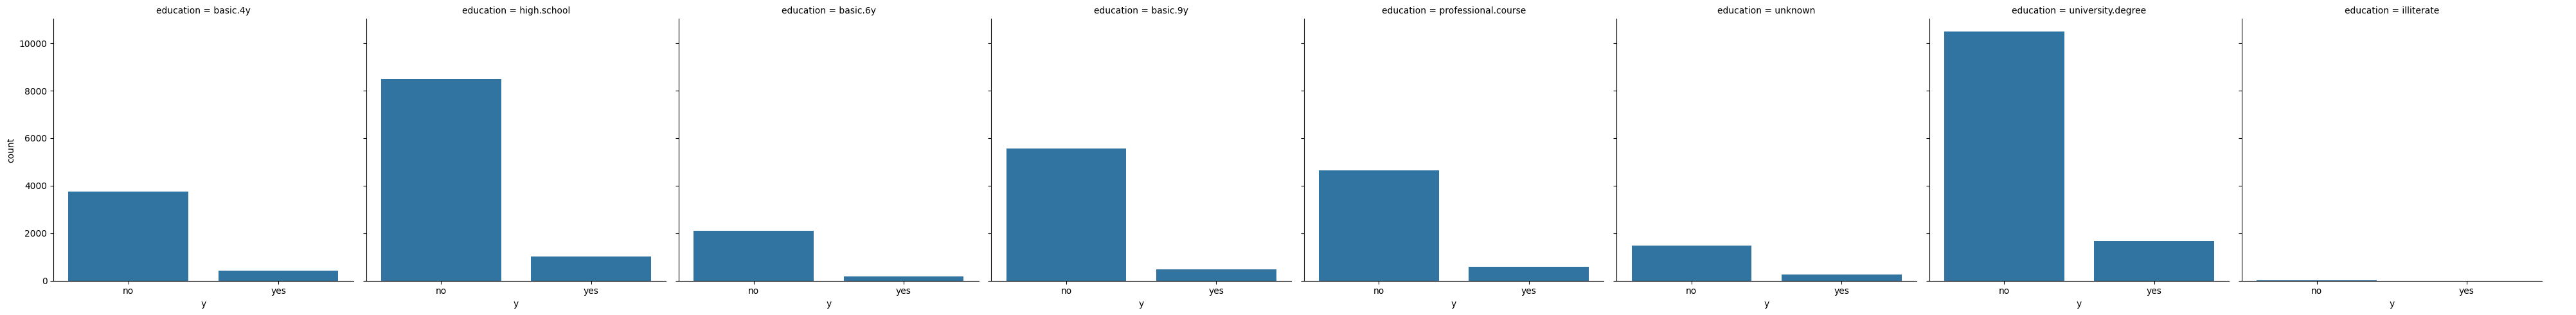

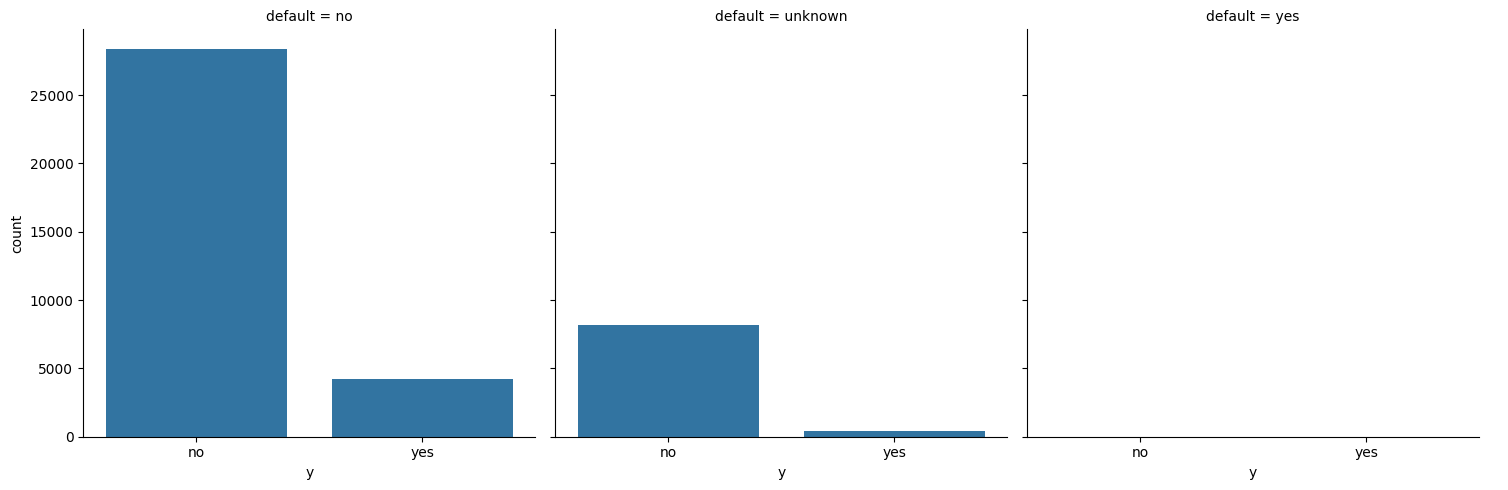

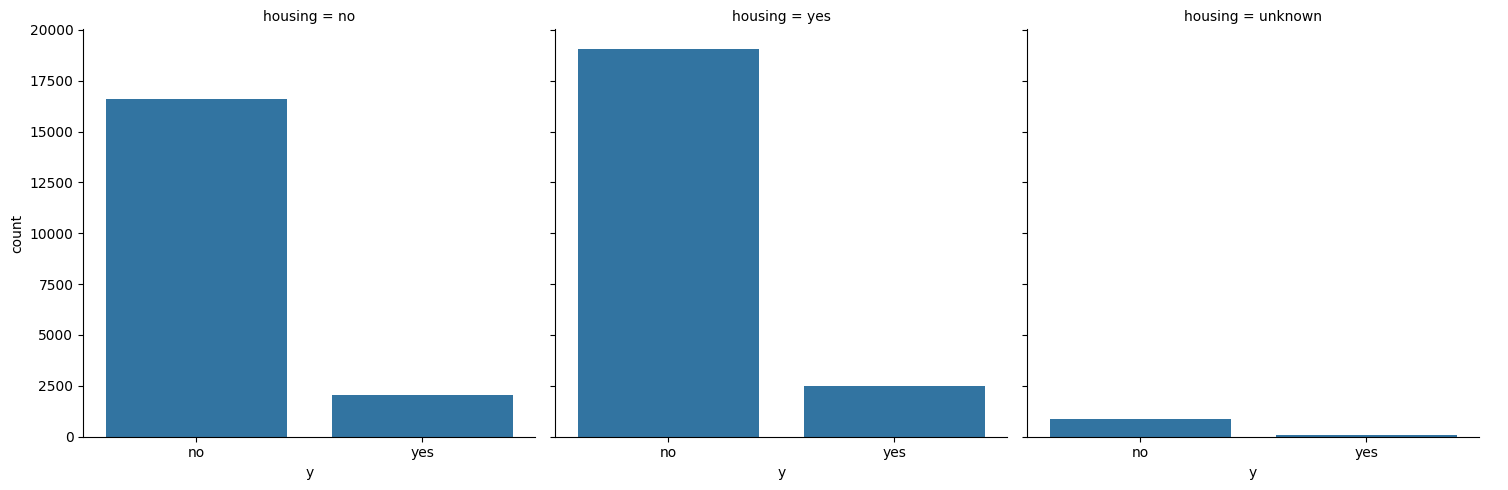

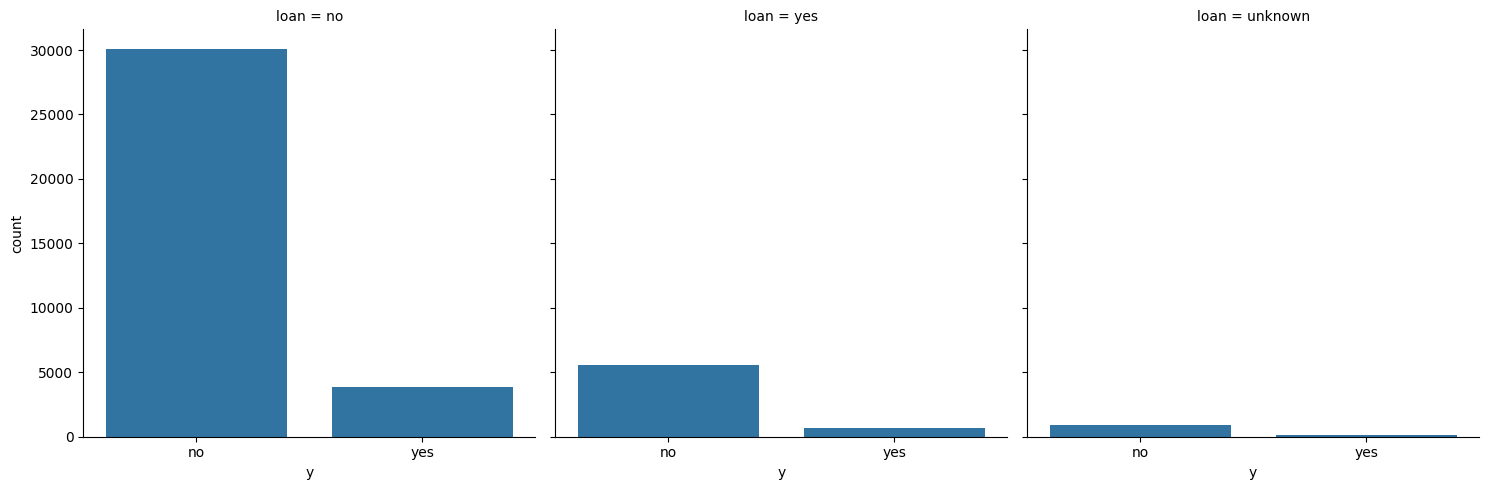

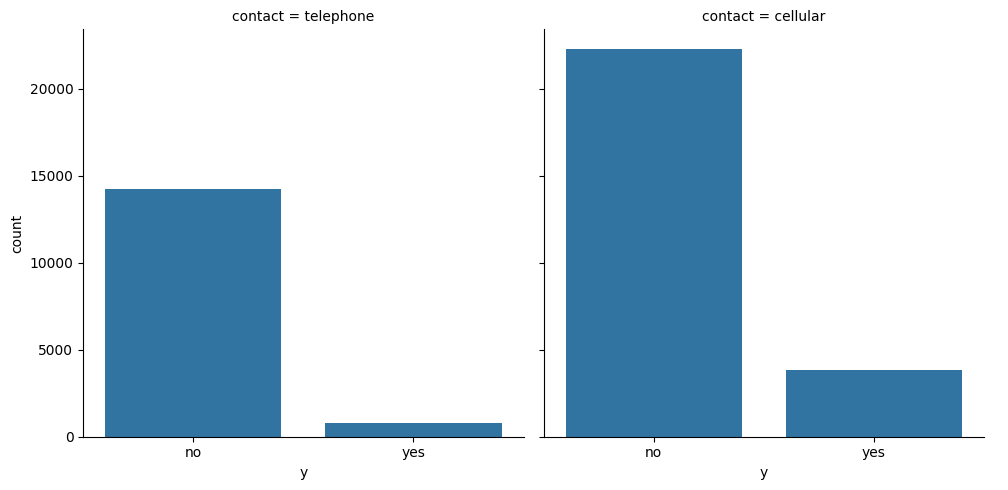

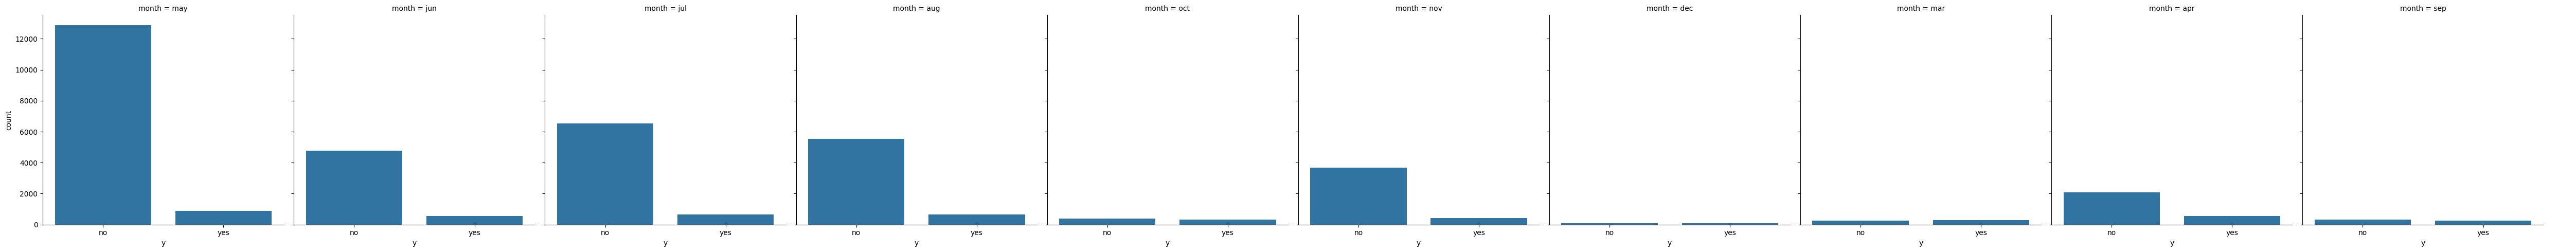

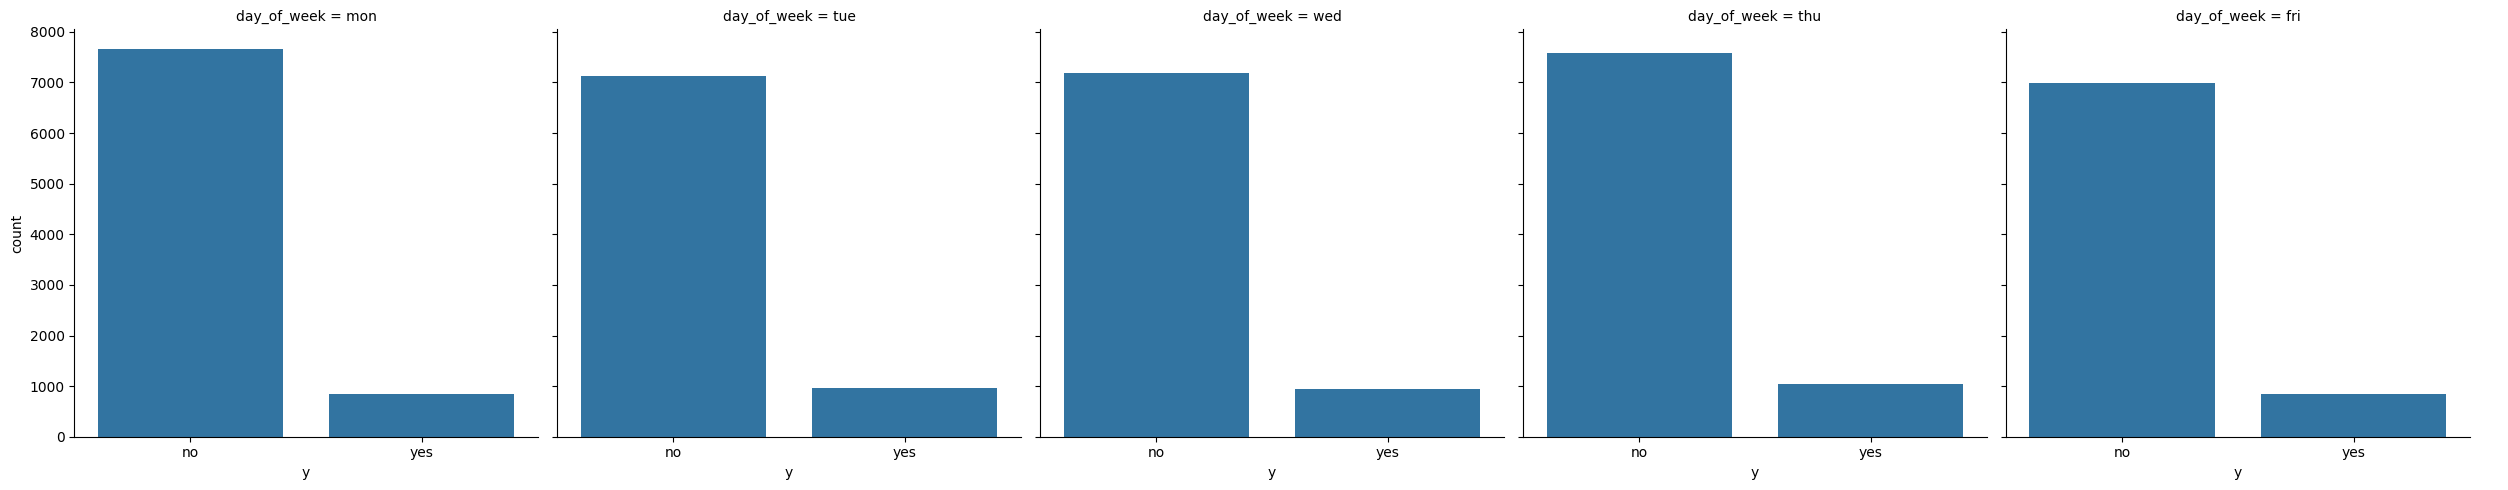

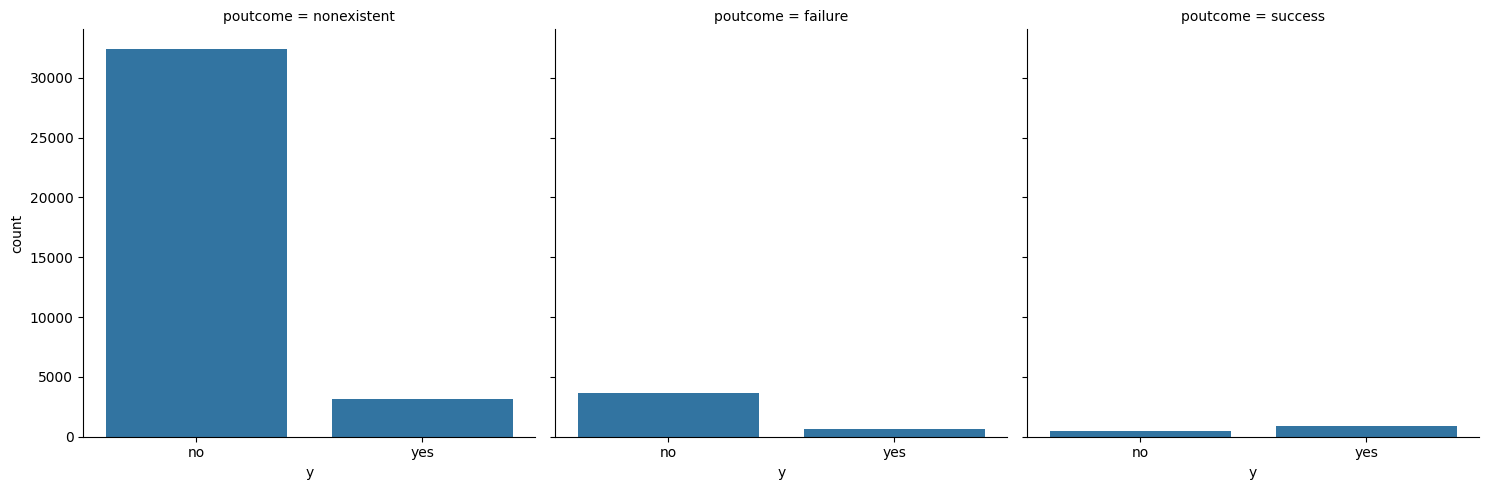

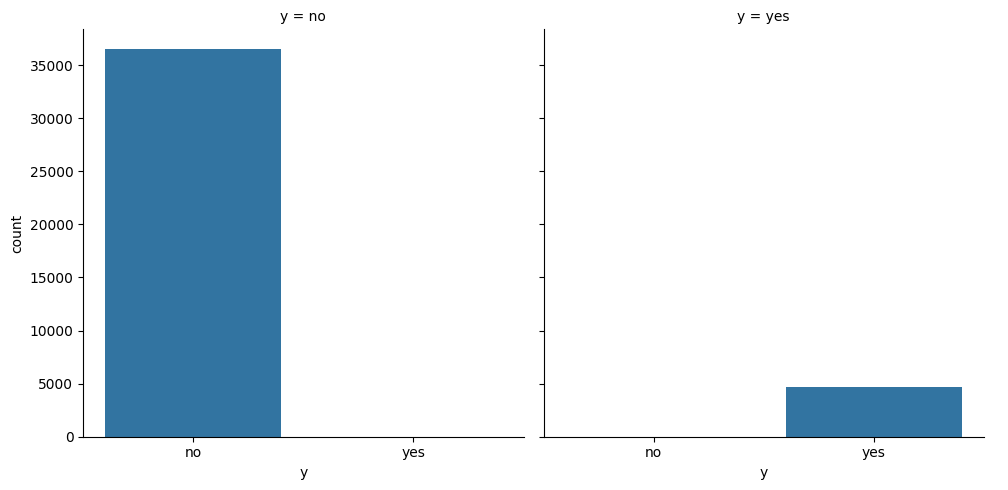

In [27]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_column in categorical_columns:
    sns.catplot(x='y', col=categorical_column, kind='count', data= df)
plt.show()

In [28]:
#Check target label split over categorical features and find the count
for categorical_column in categorical_columns:
    print(df.groupby(['y',categorical_column]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

In [ ]:

# Get unique values for each categorical feature
unique_values = {col: df_cleaned[col].unique() for col in categorical_columns}

# Display the unique values for each categorical feature
unique_values


{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['telephone', 'cellular'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'poutcome': array(['nonexistent', 'failure', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

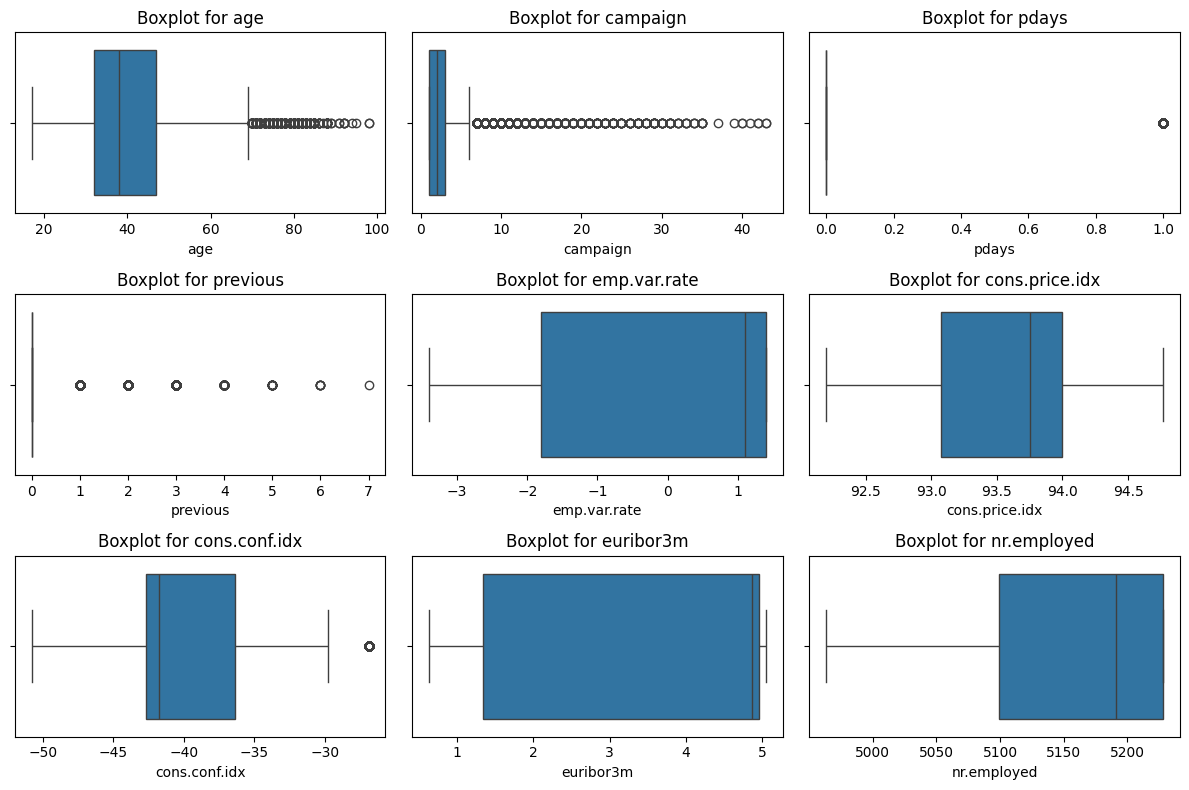

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid size as needed
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Get unique values in the 'age' column
unique_age_values = df_cleaned['age'].unique()

# Display the unique values
print(unique_age_values)


[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 19 18 70 61 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 98 94 86 84 92 89]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Explicitly specify all months for consistent one-hot encoding
all_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ensure 'month' column has all months as categories
df_cleaned['month'] = pd.Categorical(df_cleaned['month'], categories=all_months, ordered=True)

# Apply One-Hot Encoding to categorical features
df_encoded = pd.get_dummies(df_cleaned, columns=[
    'job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome'
])

# Apply Label Encoding to binary categorical features
label_encoder = LabelEncoder()

# Binary categorical columns to label encode
binary_columns = ['default', 'housing', 'loan', 'y']

# Apply Label Encoding to binary columns
for col in binary_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Check the first few rows of the encoded dataframe
print(df_encoded.head())

# Check that all month columns are present
print(df_encoded.filter(like='month_').columns)


   age  default  housing  loan  campaign  pdays  previous  emp.var.rate  \
0   56        0        0     0         1      0         0           1.1   
1   57        1        0     0         1      0         0           1.1   
2   37        0        1     0         1      0         0           1.1   
3   40        0        0     0         1      0         0           1.1   
4   56        0        0     1         1      0         0           1.1   

   cons.price.idx  cons.conf.idx  ...  month_nov  month_dec  day_of_week_fri  \
0          93.994          -36.4  ...      False      False            False   
1          93.994          -36.4  ...      False      False            False   
2          93.994          -36.4  ...      False      False            False   
3          93.994          -36.4  ...      False      False            False   
4          93.994          -36.4  ...      False      False            False   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_we

In [ ]:
# Display all columns with their data types
print(df_encoded.dtypes)


age                                int64
default                            int64
housing                            int64
loan                               int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
job_admin.                          bool
job_blue-collar                     bool
job_entrepreneur                    bool
job_housemaid                       bool
job_management                      bool
job_retired                         bool
job_self-employed                   bool
job_services                        bool
job_student                         bool
job_technician                      bool
job_unemployed                      bool
job_unknown     

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features (X) and target (y)
X = df_encoded.drop(columns=['y'])  # Drop target column from features
y = df_encoded['y']                 # Target column

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the training set and testing set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print training and testing accuracy
print(f"Training Accuracy: {training_accuracy:.2f}")
print(f"Testing Accuracy: {testing_accuracy:.2f}")

# Print classification report for the testing set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.00
Testing Accuracy: 0.90

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7133
           1       0.58      0.32      0.41       907

    accuracy                           0.90      8040
   macro avg       0.75      0.64      0.68      8040
weighted avg       0.88      0.90      0.88      8040



In [ ]:
from imblearn.over_sampling import SMOTE

# Define features (X) and target (y)
X = df_encoded.drop(columns=['y'])  # Drop target column from features
y = df_encoded['y']                 # Target column

# Apply SMOTE to handle class imbalance (generates synthetic samples for minority class)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(f"Class distribution before SMOTE: {y.value_counts()}")
print(f"Class distribution after SMOTE: {y_res.value_counts()}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution before SMOTE: y
0    35665
1     4533
Name: count, dtype: int64
Class distribution after SMOTE: y
0    35665
1    35665
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Initialize the Random Forest Classifier with hyperparameters to avoid overfitting
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,           # Number of trees
    max_depth=10,               # Limit depth of trees to prevent overfitting
    min_samples_split=10,       # Minimum samples required to split an internal node
    min_samples_leaf=5,         # Minimum samples required to be at a leaf node
    class_weight='balanced'     # Automatically adjusts weights for imbalanced classes
)

# Perform 5-fold cross-validation on the resampled training data
cv_scores = cross_val_score(rf_model, X_train_res, y_train_res, cv=5, scoring='accuracy')

# Train the model on the entire resampled training set
rf_model.fit(X_train_res, y_train_res)

# Predict on the training and testing sets
y_train_pred = rf_model.predict(X_train_res)
y_test_pred = rf_model.predict(X_test)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train_res, y_train_pred)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print cross-validation scores
print(f"Cross-validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Print training accuracy
print(f"Training Accuracy: {training_accuracy:.2f}")

# Print testing accuracy
print(f"Testing Accuracy: {testing_accuracy:.2f}")

# Print classification report for the testing set
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Print confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train_res, y_train_pred)
print("\nConfusion Matrix (Training Data):")
print(train_conf_matrix)

# Print confusion matrix for the testing set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)


Cross-validation Accuracy: 0.84 ± 0.00
Training Accuracy: 0.84
Testing Accuracy: 0.84

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      7133
           1       0.89      0.77      0.83      7133

    accuracy                           0.84     14266
   macro avg       0.84      0.84      0.84     14266
weighted avg       0.84      0.84      0.84     14266


Confusion Matrix (Training Data):
[[25866  2666]
 [ 6281 22251]]

Confusion Matrix (Test Data):
[[6459  674]
 [1634 5499]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Manually selected hyperparameters to speed up the search process
hyperparameters = [
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3}
]

best_model = None
best_accuracy = 0

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Iterate through the hyperparameters and check the accuracy
for params in hyperparameters:
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1, **params)

    rf_model.fit(X_train_res, y_train_res)

    # Predict on the training and testing sets
    y_train_pred = rf_model.predict(X_train_res)
    y_test_pred = rf_model.predict(X_test)

    # Calculate training accuracy
    training_accuracy = accuracy_score(y_train_res, y_train_pred)

    # Calculate testing accuracy
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    # Track the best model
    if testing_accuracy > best_accuracy:
        best_accuracy = testing_accuracy
        best_training_accuracy = training_accuracy
        best_model = rf_model

# Print the best testing accuracy
print(f"Best Testing Accuracy: {best_accuracy:.2f}")
print(f"Best Training Accuracy: {best_training_accuracy:.2f}")

# Print classification report for the best model on the test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, best_model.predict(X_test)))

# Print confusion matrix for the best model on the test data
test_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)


Best Testing Accuracy: 0.94
Best Training Accuracy: 0.97

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7133
           1       0.94      0.94      0.94      7133

    accuracy                           0.94     14266
   macro avg       0.94      0.94      0.94     14266
weighted avg       0.94      0.94      0.94     14266


Confusion Matrix (Test Data):
[[6722  411]
 [ 445 6688]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

# Manually selected hyperparameters to speed up the search process
hyperparameters = [
    {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3},
    {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3},
]

best_model = None
best_accuracy = 0

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train_res, X_test, y_train_res, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Iterate through the hyperparameters and check the accuracy
for params in hyperparameters:
    rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1, **params)

    # Use cross-validation to evaluate performance and prevent overfitting
    cv_scores = cross_val_score(rf_model, X_train_res, y_train_res, cv=5, scoring='accuracy')

    # Calculate the mean cross-validation score
    cv_mean_score = np.mean(cv_scores)

    # Train the model using the entire training data
    rf_model.fit(X_train_res, y_train_res)

    # Predict on the training and testing sets
    y_train_pred = rf_model.predict(X_train_res)
    y_test_pred = rf_model.predict(X_test)

    # Calculate training accuracy
    training_accuracy = accuracy_score(y_train_res, y_train_pred)

    # Calculate testing accuracy
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    # Track the best model based on cross-validation score
    if cv_mean_score > best_accuracy:
        best_accuracy = cv_mean_score
        best_training_accuracy = training_accuracy
        best_model = rf_model

# Print the best testing accuracy
print(f"Best Testing Accuracy (CV Mean): {best_accuracy:.2f}")
print(f"Best Training Accuracy: {best_training_accuracy:.2f}")

# Print classification report for the best model on the test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, best_model.predict(X_test)))

# Print confusion matrix for the best model on the test data
test_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
print("\nConfusion Matrix (Test Data):")
print(test_conf_matrix)


Best Testing Accuracy (CV Mean): 0.92
Best Training Accuracy: 0.95

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7133
           1       0.93      0.92      0.93      7133

    accuracy                           0.93     14266
   macro avg       0.93      0.93      0.93     14266
weighted avg       0.93      0.93      0.93     14266


Confusion Matrix (Test Data):
[[6660  473]
 [ 560 6573]]
